# Hackathon Challenge: "Climate Change Impact Analysis"

#### data analysis and wrangling

**Import some libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Acquire data

In [2]:
data=pd.read_csv('climate_change_data.csv')

In [3]:
data.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


## Exploratory Data Analysis

In [4]:
print(data.columns.values)

['Date' 'Location' 'Country' 'Temperature' 'CO2 Emissions'
 'Sea Level Rise' 'Precipitation' 'Humidity' 'Wind Speed']


In [5]:
data.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


### Columns Info

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10000 non-null  object 
 1   Location        10000 non-null  object 
 2   Country         10000 non-null  object 
 3   Temperature     10000 non-null  float64
 4   CO2 Emissions   10000 non-null  float64
 5   Sea Level Rise  10000 non-null  float64
 6   Precipitation   10000 non-null  float64
 7   Humidity        10000 non-null  float64
 8   Wind Speed      10000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 703.3+ KB


### Statistical Report

In [7]:
data.describe()

,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,14.936034,400.220469,-0.003152,49.881208,49.771302,25.082066
std,5.030616,49.696933,0.991349,28.862417,28.929320,14.466648
min,-3.803589,182.131220,-4.092155,0.010143,0.018998,0.001732
25%,11.577991,367.109330,-0.673809,24.497516,24.713250,12.539733
50%,14.981136,400.821324,0.002332,49.818967,49.678412,24.910787
75%,18.305826,433.307905,0.675723,74.524991,75.206390,37.670260
max,33.976956,582.899701,4.116559,99.991900,99.959665,49.997664


### Checking for Nans

In [8]:
print(data.isna().sum())

Date              0
Location          0
Country           0
Temperature       0
CO2 Emissions     0
Sea Level Rise    0
Precipitation     0
Humidity          0
Wind Speed        0
dtype: int64


## Clearing Data
### Handling Missing values

In [9]:
#The Dataset is Clean

## Data Analysis

In [10]:
data['Date'] = pd.to_datetime(data['Date'])

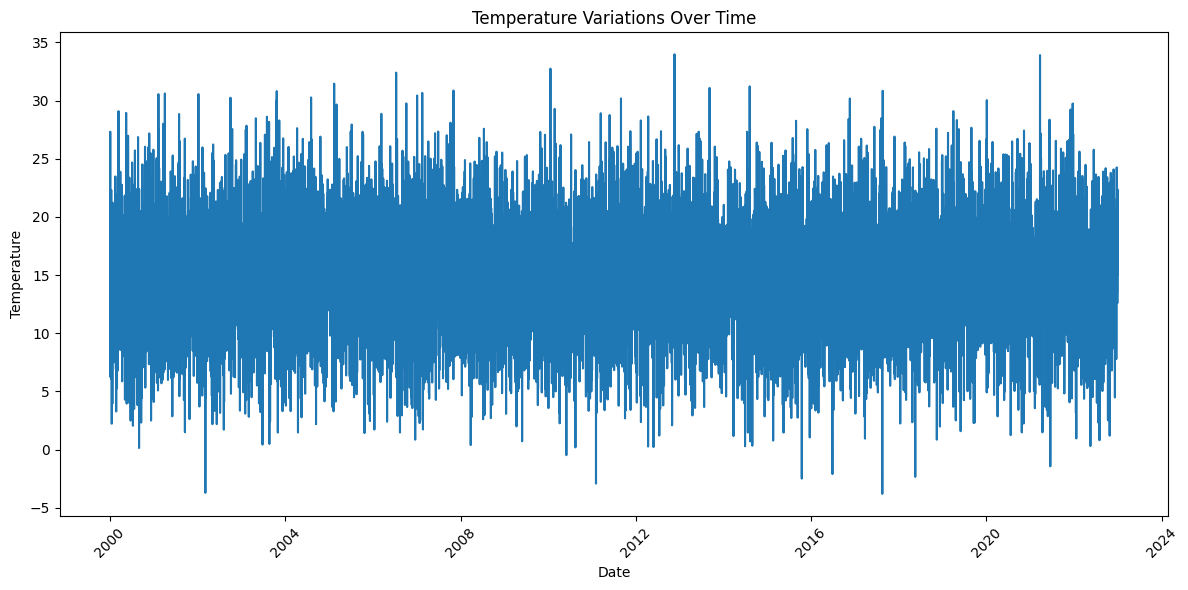

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Date', y='Temperature')
plt.title('Temperature Variations Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Precipitation Patterns

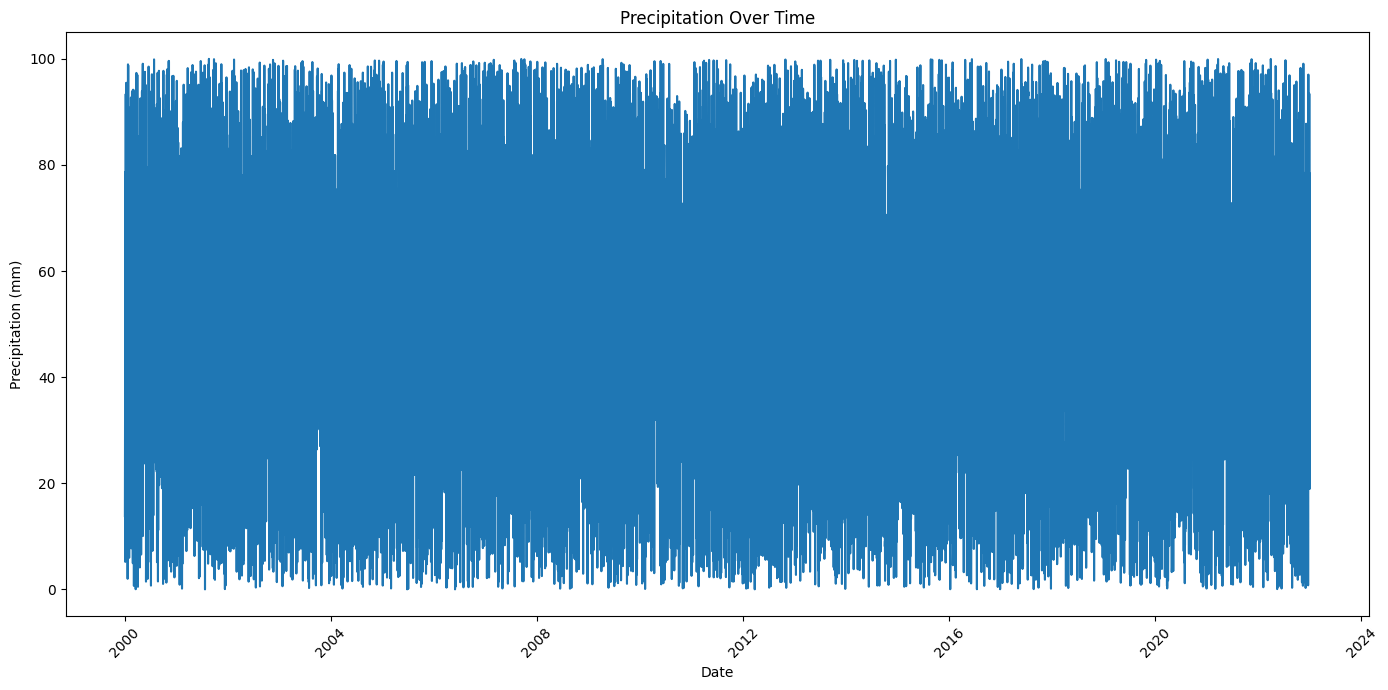

In [12]:
#Time Series Plot of Precipitation
plt.figure(figsize=(14, 7))
sns.lineplot(data=data, x='Date', y='Precipitation')
plt.title('Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

     Year  Month  Precipitation
0    2000      1      48.944131
1    2000      2      49.707122
2    2000      3      54.209422
3    2000      4      46.330378
4    2000      5      64.273950
..    ...    ...            ...
271  2022      8      40.807102
272  2022      9      49.620523
273  2022     10      47.222380
274  2022     11      40.160835
275  2022     12      46.155452

[276 rows x 3 columns]


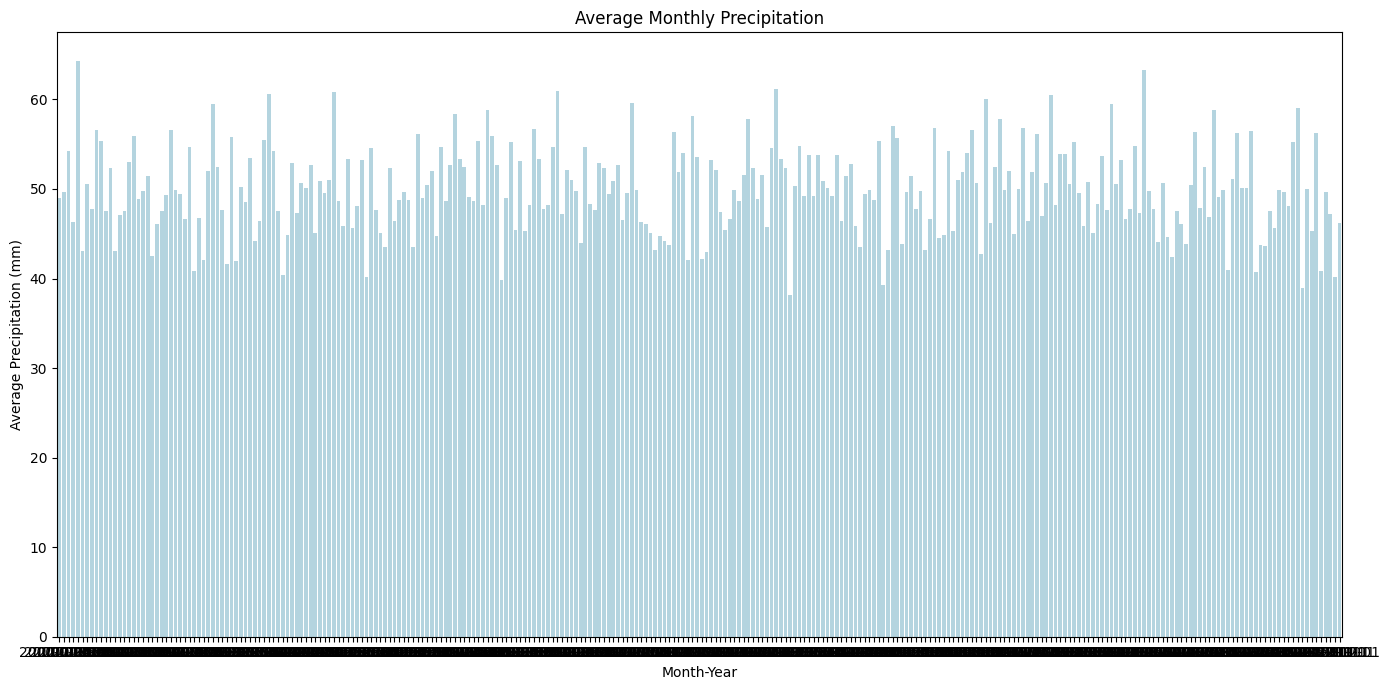

In [13]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

monthly_avg = data.groupby(['Year', 'Month'])['Precipitation'].mean().reset_index()

print(monthly_avg)

monthly_avg['Month-Year'] = pd.to_datetime(monthly_avg[['Year', 'Month']].assign(DAY=1))

plt.figure(figsize=(14, 7))
sns.barplot(data=monthly_avg, x='Month-Year', y='Precipitation', color='lightblue')
plt.title('Average Monthly Precipitation')
plt.xlabel('Month-Year')
plt.ylabel('Average Precipitation (mm)')
plt.tight_layout()
plt.show()

C:\Users\Ameera Ahmed\AppData\Local\Temp\ipykernel_17332\1982188934.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Month', y='Precipitation', palette='Set3')


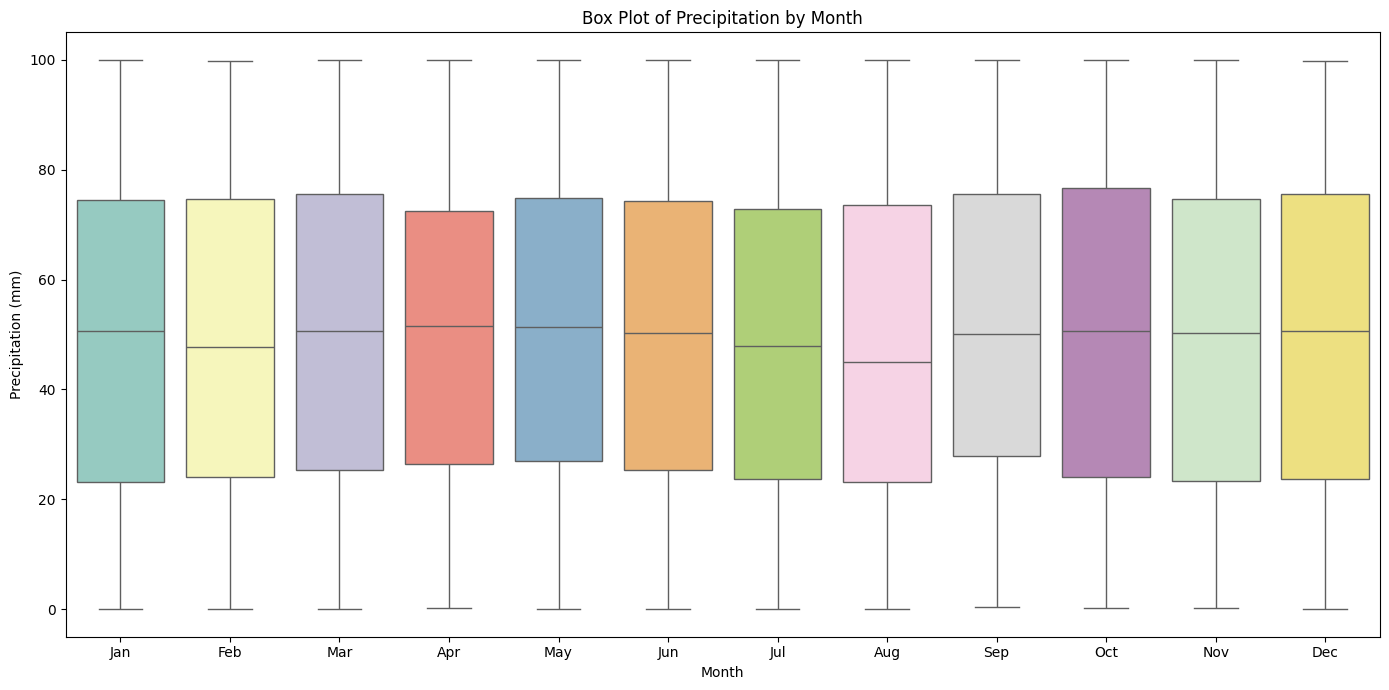

In [14]:
# Box Plot of Precipitation by Month
plt.figure(figsize=(14, 7))
sns.boxplot(data=data, x='Month', y='Precipitation', palette='Set3')
plt.title('Box Plot of Precipitation by Month')
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

In [15]:
data.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Year,Month
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000,1
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,2000,1
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,2000,1
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563,2000,1
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164,2000,1


 Correlation Analysis

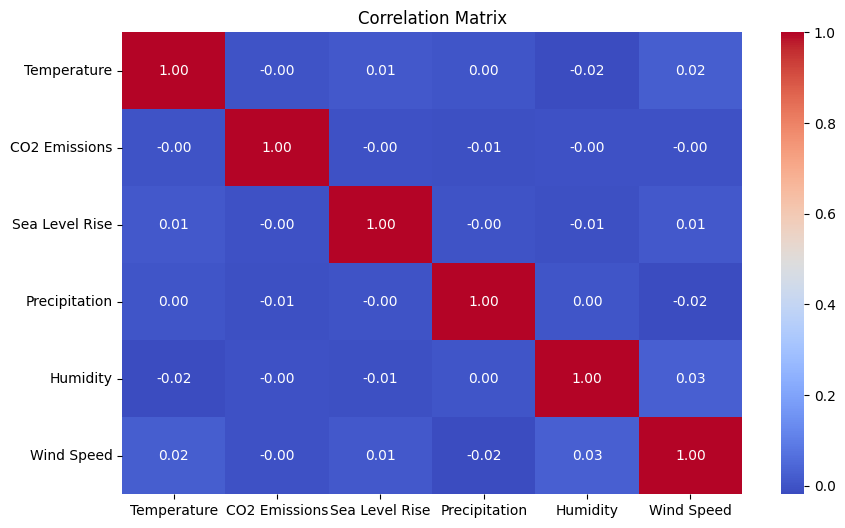

In [16]:
correlation_matrix = data[['Temperature', 'CO2 Emissions', 'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Frequency of extreme weather events

In [17]:
# Thresholds for extreme events
extreme_heat_threshold = 35
extreme_precipitation_threshold = 100

data['Extreme Heat'] = data['Temperature'] > extreme_heat_threshold
data['Extreme Precipitation'] = data['Precipitation'] > extreme_precipitation_threshold

extreme_heat_counts = data.groupby(data['Date'].dt.year)['Extreme Heat'].sum().reset_index()
print(extreme_heat_counts)

extreme_precipitation_counts = data.groupby(data['Date'].dt.year)['Extreme Precipitation'].sum().reset_index()

    Date  Extreme Heat
0   2000             0
1   2001             0
2   2002             0
3   2003             0
4   2004             0
5   2005             0
6   2006             0
7   2007             0
8   2008             0
9   2009             0
10  2010             0
11  2011             0
12  2012             0
13  2013             0
14  2014             0
15  2015             0
16  2016             0
17  2017             0
18  2018             0
19  2019             0
20  2020             0
21  2021             0
22  2022             0


In [18]:
data.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Year,Month,Extreme Heat,Extreme Precipitation
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000,1,False,False
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,2000,1,False,False
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,2000,1,False,False
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563,2000,1,False,False
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164,2000,1,False,False


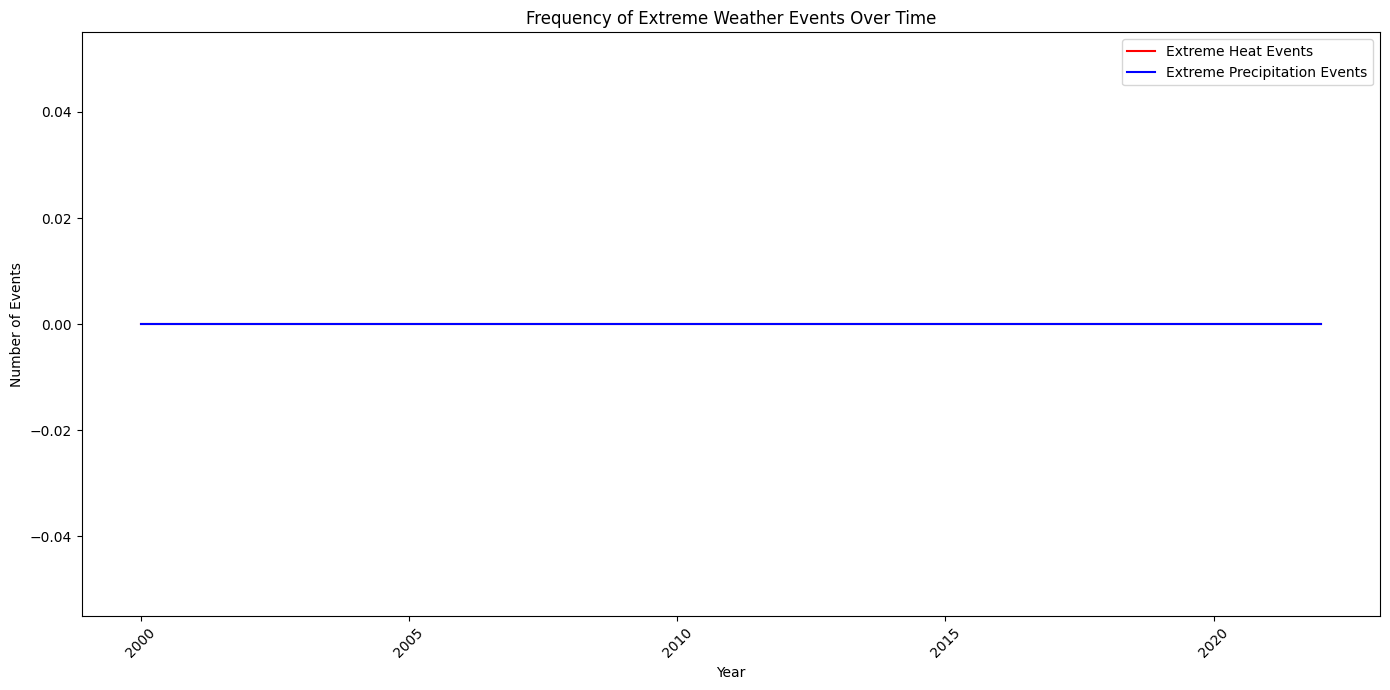

In [19]:
plt.figure(figsize=(14, 7))

# Plot extreme heat events
sns.lineplot(data=extreme_heat_counts, x='Date', y='Extreme Heat', label='Extreme Heat Events', color='red')

# Plot extreme precipitation events
sns.lineplot(data=extreme_precipitation_counts, x='Date', y='Extreme Precipitation', label='Extreme Precipitation Events', color='blue')

plt.title('Frequency of Extreme Weather Events Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


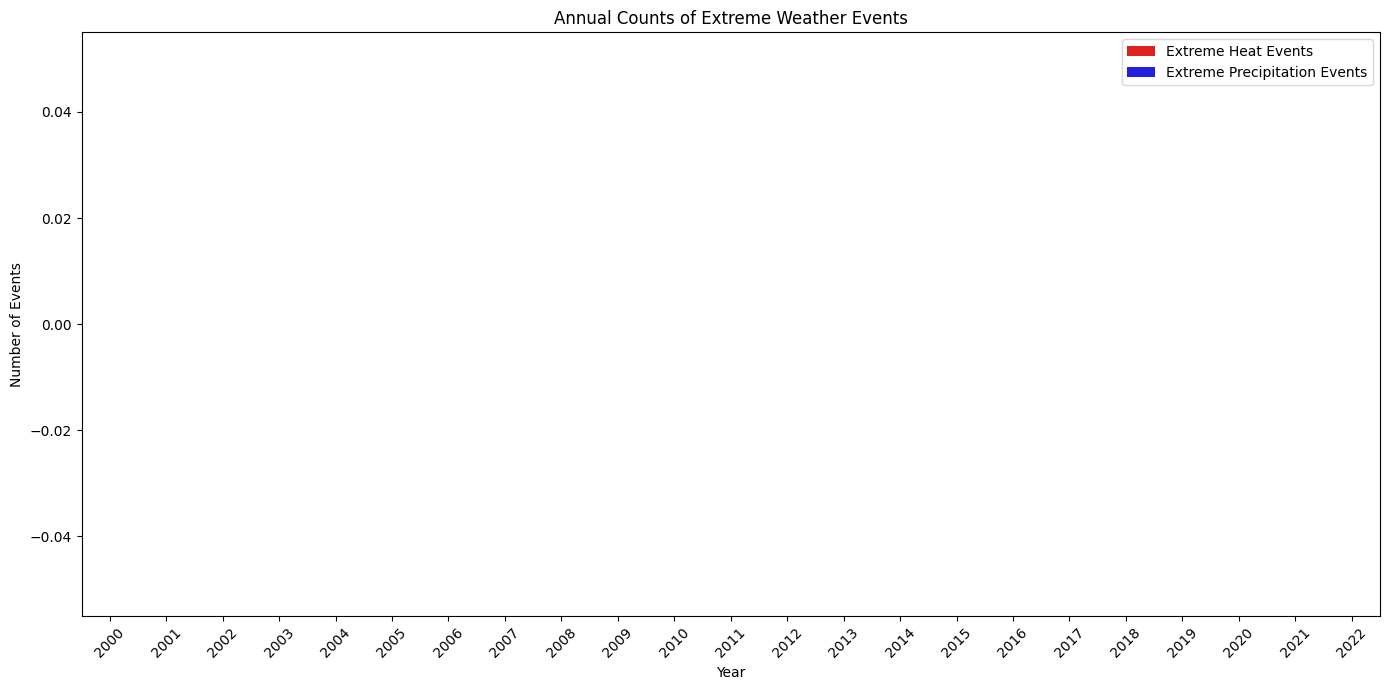

In [20]:
plt.figure(figsize=(14, 7))
sns.barplot(data=extreme_heat_counts, x='Date', y='Extreme Heat', color='red', label='Extreme Heat Events')
sns.barplot(data=extreme_precipitation_counts, x='Date', y='Extreme Precipitation', color='blue', label='Extreme Precipitation Events')
plt.title('Annual Counts of Extreme Weather Events')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [21]:
# Thresholds for extreme events
extreme_humidity_threshold = 90
extreme_wind_speed_threshold = 30
extreme_sea_level_rise_threshold = 1

data['Extreme Humidity'] = data['Humidity'] > extreme_humidity_threshold
data['Extreme Wind Speed'] = data['Wind Speed'] > extreme_wind_speed_threshold
data['Extreme Sea Level Rise'] = data['Sea Level Rise'] > extreme_sea_level_rise_threshold

# Count extreme humidity events per year
extreme_humidity_counts = data.groupby(data['Date'].dt.year)['Extreme Humidity'].sum().reset_index()

# Count extreme wind speed events per year
extreme_wind_speed_counts = data.groupby(data['Date'].dt.year)['Extreme Wind Speed'].sum().reset_index()

# Count extreme sea level rise events per year
extreme_sea_level_counts = data.groupby(data['Date'].dt.year)['Extreme Sea Level Rise'].sum().reset_index()

In [22]:
data.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Year,Month,Extreme Heat,Extreme Precipitation,Extreme Humidity,Extreme Wind Speed,Extreme Sea Level Rise
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000,1,False,False,False,False,False
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,2000,1,False,False,False,True,True
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,2000,1,False,False,True,True,False
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563,2000,1,False,False,False,False,False
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164,2000,1,False,False,False,False,True


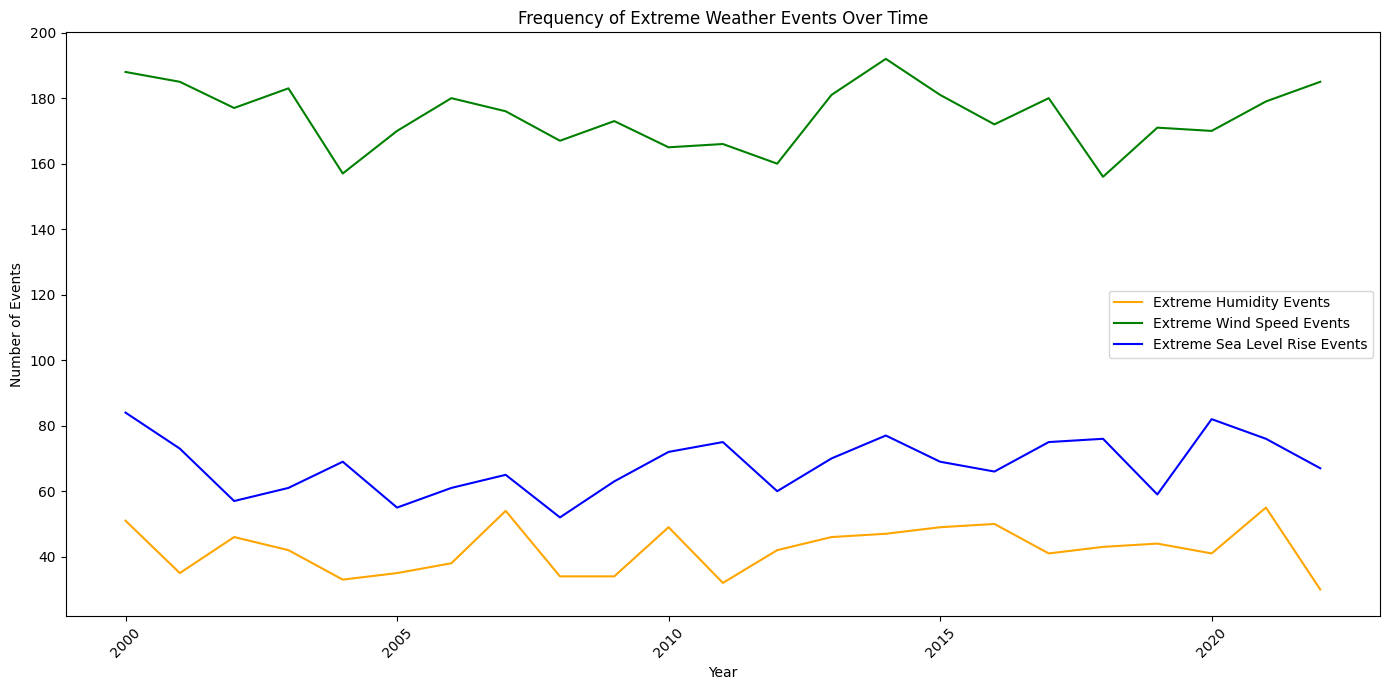

In [23]:
plt.figure(figsize=(14, 7))

# Extreme humidity events plot
sns.lineplot(data=extreme_humidity_counts, x='Date', y='Extreme Humidity', label='Extreme Humidity Events', color='orange')

# extreme wind speed events Plot
sns.lineplot(data=extreme_wind_speed_counts, x='Date', y='Extreme Wind Speed', label='Extreme Wind Speed Events', color='green')

# extreme sea level rise events plot
sns.lineplot(data=extreme_sea_level_counts, x='Date', y='Extreme Sea Level Rise', label='Extreme Sea Level Rise Events', color='blue')

plt.title('Frequency of Extreme Weather Events Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


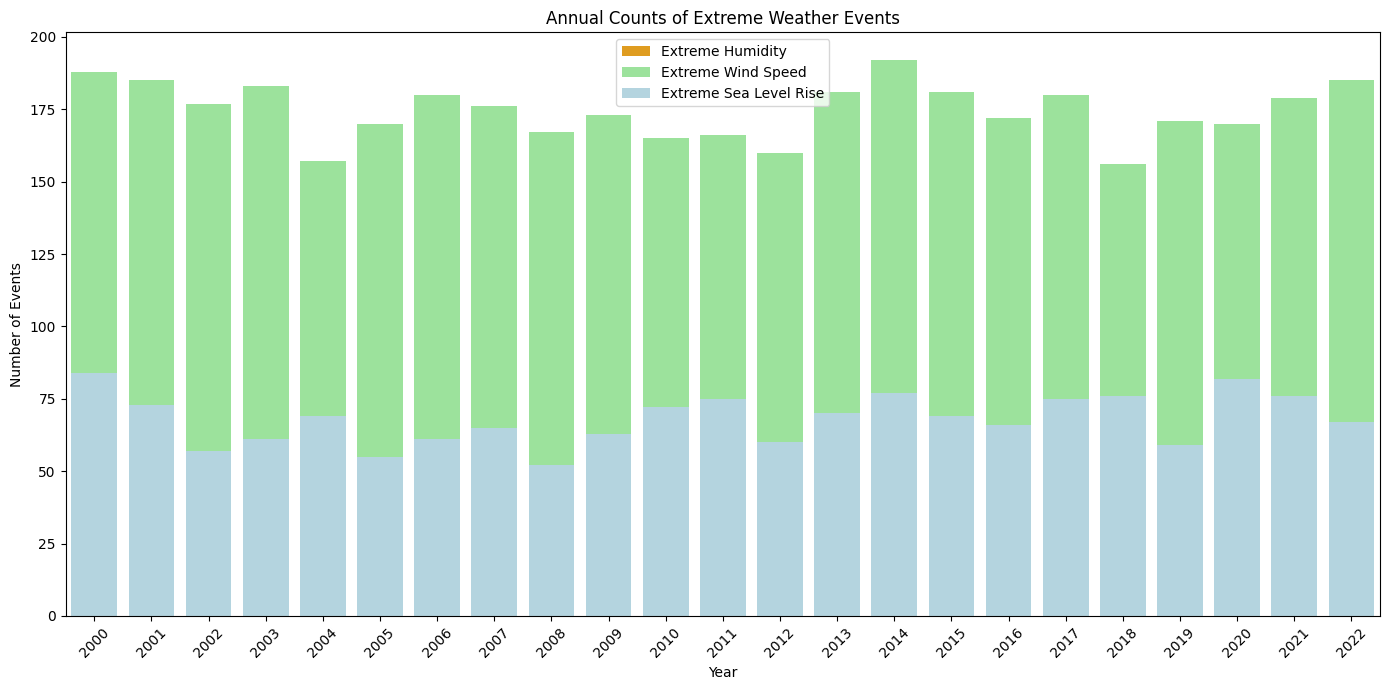

In [24]:
plt.figure(figsize=(14, 7))
sns.barplot(data=extreme_humidity_counts, x='Date', y='Extreme Humidity', color='orange', label='Extreme Humidity')
sns.barplot(data=extreme_wind_speed_counts, x='Date', y='Extreme Wind Speed', color='lightgreen', label='Extreme Wind Speed')
sns.barplot(data=extreme_sea_level_counts, x='Date', y='Extreme Sea Level Rise', color='lightblue', label='Extreme Sea Level Rise')
plt.title('Annual Counts of Extreme Weather Events')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Analyze the relationships between CO2 levels and temperature changes over time.

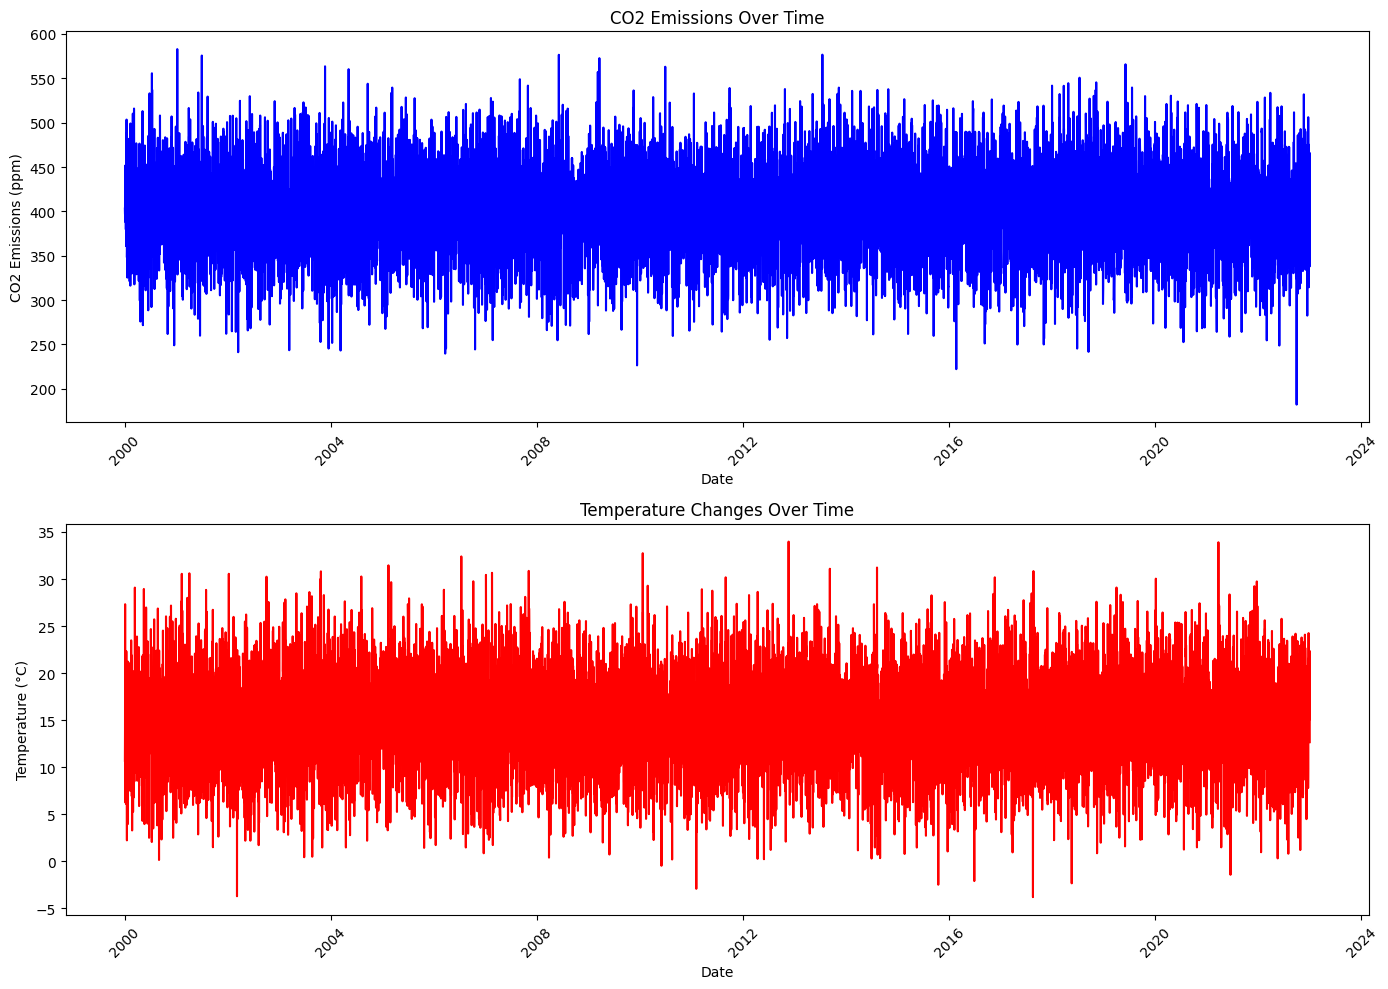

Correlation between CO2 Emissions and Temperature: -0.00


In [25]:
data.set_index('Date', inplace=True)

plt.figure(figsize=(14, 10))

#  CO2 levels plot
plt.subplot(2, 1, 1)
sns.lineplot(data=data, x=data.index, y='CO2 Emissions', color='blue')
plt.title('CO2 Emissions Over Time')
plt.ylabel('CO2 Emissions (ppm)')
plt.xticks(rotation=45)

#  Temperature plot
plt.subplot(2, 1, 2)
sns.lineplot(data=data, x=data.index, y='Temperature', color='red')
plt.title('Temperature Changes Over Time')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# correlation
correlation = data[['CO2 Emissions', 'Temperature']].corr().iloc[0, 1]
print(f"Correlation between CO2 Emissions and Temperature: {correlation:.2f}")



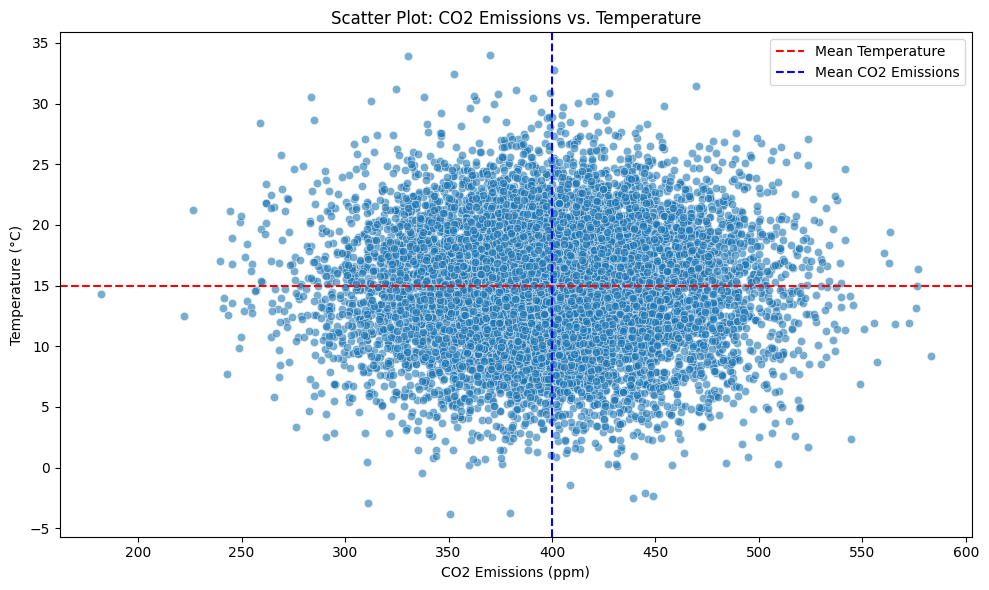

In [26]:
# Scatter plot for  CO2 Emissions vs. Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='CO2 Emissions', y='Temperature', alpha=0.6)
plt.title('Scatter Plot: CO2 Emissions vs. Temperature')
plt.xlabel('CO2 Emissions (ppm)')
plt.ylabel('Temperature (°C)')
plt.axhline(y=data['Temperature'].mean(), color='r', linestyle='--', label='Mean Temperature')
plt.axvline(x=data['CO2 Emissions'].mean(), color='b', linestyle='--', label='Mean CO2 Emissions')
plt.legend()
plt.tight_layout()
plt.show()


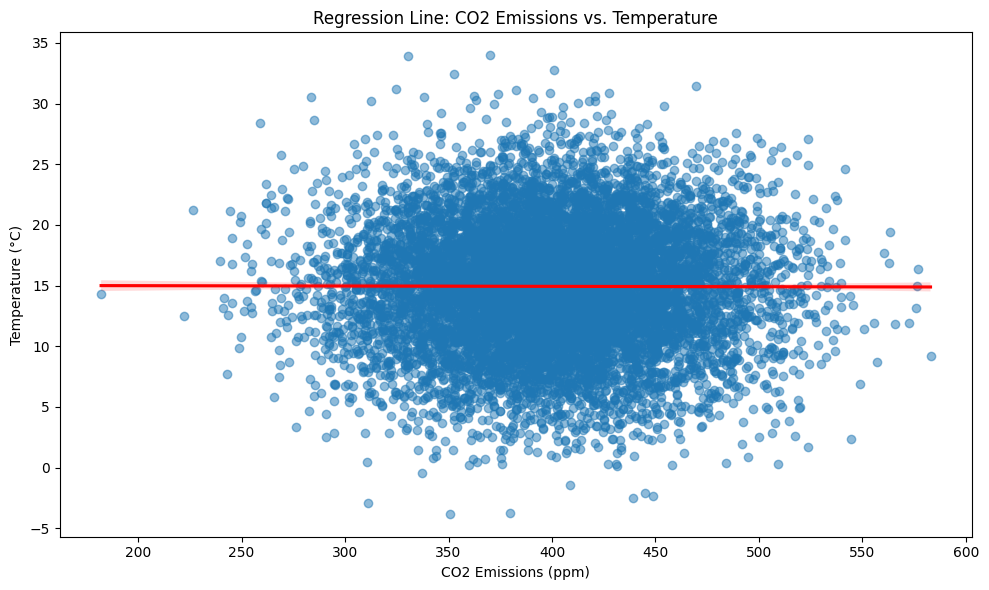

In [27]:
# Regression plot for CO2 Emissions vs. Temperature
plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='CO2 Emissions', y='Temperature', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Regression Line: CO2 Emissions vs. Temperature')
plt.xlabel('CO2 Emissions (ppm)')
plt.ylabel('Temperature (°C)')
plt.tight_layout()
plt.show()

 Regression Analysis

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [29]:
# Select features and target variable
X = data[['CO2 Emissions']]
y = data['Temperature']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2:.2f}')

Mean Squared Error: 25.75
R2 Score: -0.00


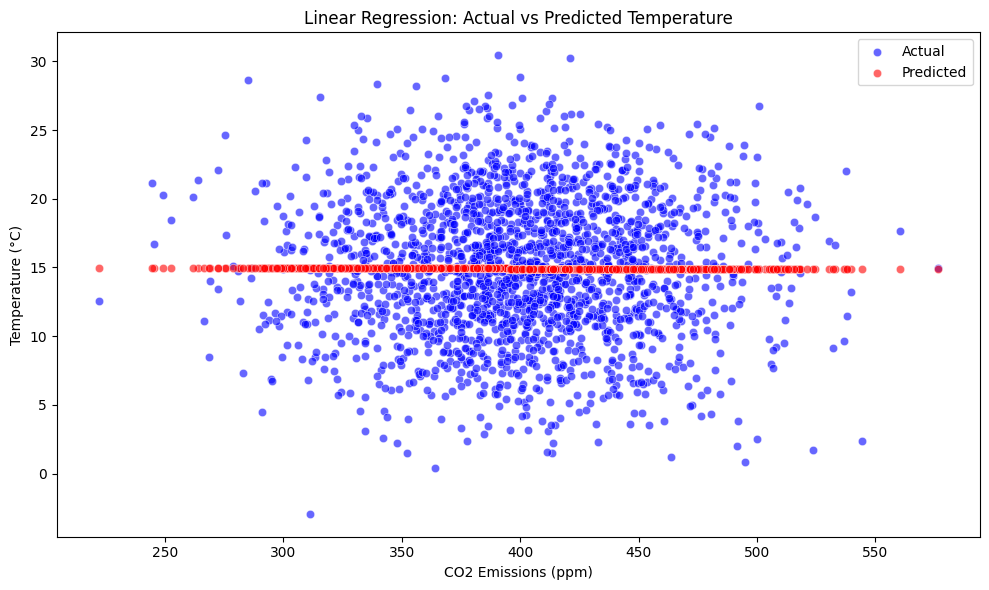

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['CO2 Emissions'], y=y_test, label='Actual', color='blue', alpha=0.6)
sns.scatterplot(x=X_test['CO2 Emissions'], y=y_pred, label='Predicted', color='red', alpha=0.6)
plt.title('Linear Regression: Actual vs Predicted Temperature')
plt.xlabel('CO2 Emissions (ppm)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.tight_layout()
plt.show()

Time Series Forecasting

In [32]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [33]:
# Fitting the Holt-Winters model for temperature
model_hw = ExponentialSmoothing(data['Temperature'], trend='add', seasonal='add', seasonal_periods=12)
model_fit = model_hw.fit()

forecast_steps = 12  
forecast = model_fit.forecast(forecast_steps)
print(forecast)

c:\Users\Ameera Ahmed\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ameera Ahmed\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Ameera Ahmed\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


10000    15.955186
10001    16.074352
10002    15.936616
10003    15.466351
10004    14.816510
10005    15.963802
10006    16.010150
10007    15.121292
10008    15.891824
10009    16.282041
10010    16.060706
10011    16.660437
dtype: float64


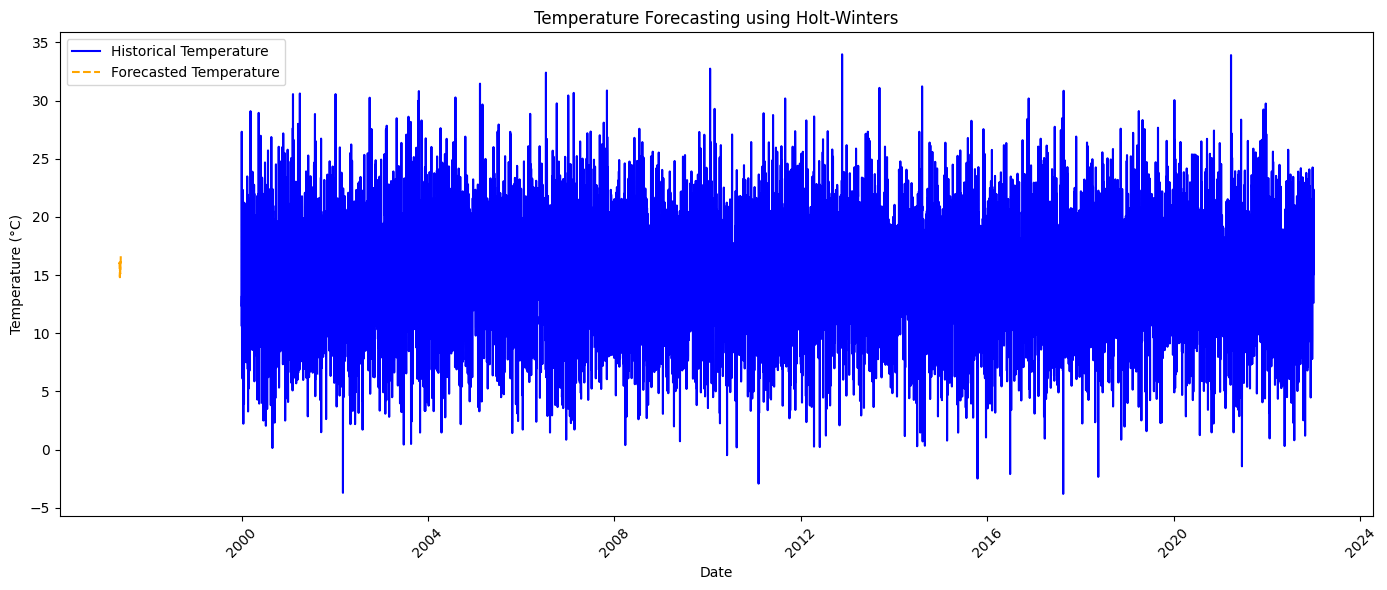

In [34]:
# Forecasting plot
plt.figure(figsize=(14, 6))
plt.plot(data['Temperature'], label='Historical Temperature', color='blue')
plt.plot(forecast, label='Forecasted Temperature', color='orange', linestyle='--')
plt.title('Temperature Forecasting using Holt-Winters')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()